In [5]:
# 2019-11-14
# A. Pendleton
# Expression line plots for gene list generated from sample filtration steps

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys

#Plotting
import pandas as pd
import seaborn as sns
import fastcluster

In [7]:
# For interactivity
from __future__ import print_function
import plotly
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) #Make it work in notebook mode
import plotly.graph_objs as go


init_notebook_mode(connected=True)



In [ ]:
#plotly.__version__



The below geneList would be a python list of gene identifiers that was propagated following sample filtration steps such as: 
    - Search by gene ID(s)
    - Search by homolog ID(s)
    - Search by functional annotations
    - Filtration by expression thresholds and/or patterns from the drop-down expression lists

## Inputs

This plot requires the following information:

- $ROOT/Genes_expression.txt
- list of genes to plot that was populated using any of the steps outlined in above cell. 

#### Define root directory

In [8]:
rootDir = '/depot/jwisecav/data/pendlea/coexpression_assessments/development/coexp_development/'

#### Sample file

In [9]:
#Define the sample file
# File naming is static -- should always be the file name "samples.txt"
sampleFile = rootDir + 'samples.txt'

#### Global gene expression file

In [10]:
#Define expression file. 
# File naming is static -- should always be file name "Genes_expression.txt"
expFile = rootDir + 'Genes_expression.txt'


#### Gene list to plot

##### Practice gene list 

In [18]:
#geneList = ["Sevir.1G000300","Sevir.1G001000","Sevir.1G001100","Sevir.1G001600","Sevir.1G001700","Sevir.1G001800","Sevir.1G001900","Sevir.1G002400","Sevir.1G002800","Sevir.1G002900","Sevir.1G003200","Sevir.1G003401","Sevir.1G003500","Sevir.1G003600","Sevir.1G004400","Sevir.1G004600","Sevir.1G004700","Sevir.1G004800","Sevir.1G005300","Sevir.1G005400","Sevir.1G005800","Sevir.1G007466","Sevir.1G007700","Sevir.1G007766","Sevir.1G007800","Sevir.1G008100","Sevir.1G008300","Sevir.1G008400","Sevir.1G008700","Sevir.1G008801","Sevir.1G009000","Sevir.1G010200","Sevir.1G011700","Sevir.1G012100","Sevir.1G012300","Sevir.1G012500","Sevir.1G012700","Sevir.1G012800","Sevir.1G013100","Sevir.1G013450"]


geneList = ["Sevir.9G282425", "Sevir.7G018910", "Sevir.5G044500", "Sevir.2G127900", "Sevir.5G129000", 
            "Sevir.2G354400", "Sevir.2G152600", "Sevir.7G023700", "Sevir.4G118900", "Sevir.8G081600", 
            "Sevir.5G364132", "Sevir.4G263301", "Sevir.9G099466", "Sevir.9G078500", "Sevir.2G263800", 
            "Sevir.8G218520", "Sevir.3G390900", "Sevir.9G165400", "Sevir.8G245140", "Sevir.8G087000", 
            "Sevir.9G576201", "Sevir.5G470750", "Sevir.1G060850", "Sevir.2G280500", "Sevir.9G268200", 
            "Sevir.4G143101", "Sevir.2G342800", "Sevir.1G019900", "Sevir.3G353500", "Sevir.7G189700", 
            "Sevir.4G118600", "Sevir.5G315900", "Sevir.1G110232", "Sevir.5G206100", "Sevir.3G353200", 
            "Sevir.4G093300", "Sevir.1G171100", "Sevir.2G305750", "Sevir.9G169700", "Sevir.1G020800", 
            "Sevir.5G194900", "Sevir.6G028050", "Sevir.2G003200", "Sevir.8G079100", "Sevir.4G293501", 
            "Sevir.7G022900", "Sevir.8G165900", "Sevir.9G092300", "Sevir.6G113200", "Sevir.4G160200", 
            "Sevir.5G037400", "Sevir.3G298200", "Sevir.2G437300", "Sevir.9G095700", "Sevir.1G265000", 
            "Sevir.5G418900", "Sevir.8G237700", "Sevir.2G177600", "Sevir.9G253801", "Sevir.6G183566", 
            "Sevir.8G259500", "Sevir.5G036550", "Sevir.7G279700", "Sevir.8G068450", "Sevir.9G576750", 
            "Sevir.9G248533", "Sevir.1G379100", "Sevir.8G222414", "Sevir.6G039200", "Sevir.6G075100", 
            "Sevir.3G331800", "Sevir.4G164200", "Sevir.9G347733", "Sevir.2G396750", "Sevir.3G116100", 
            "Sevir.7G061100", "Sevir.2G307100", "Sevir.5G087400", "Sevir.7G005300", "Sevir.2G026100", 
            "Sevir.9G072900"]

#What is the maximum number of genes to plot?
maxGenesToPlot = min(100, len(geneList)) #Either 100 or the length of the total gene list

#If the length of genes in geneList is

#Get the list of genes we'll be plotting
genesToPlot = geneList[0:maxGenesToPlot]

print('%i genes in geneList' % len(geneList))     
print('%i genes to plot' % len(genesToPlot))


81 genes in geneList
81 genes to plot


___________

### Store the sample information
##### Link the sample IDs to conditions and experiments

In [19]:
#Dictionary to store the sample information
# the dictionary should have the following structure:
#.      sampleDict[sampleID] = condition

sampleDict = {} 
conditionDict = {}
experiments = []

lineCount = 0# Track the line count while parsing sample file

for line in open(sampleFile, 'r'): #Parse each data file line
    line=line.rstrip().split('\t') #strip and split this tab-delimited file
    
    lineCount += 1 #add one to line count
    
    #Ignore header line
    if lineCount == 1:
        continue
    
    sampleID = line[0]
    condition = line[1] 
    experiment = line[2]
    
    sampleDict[sampleID] = [condition, experiment] #Track how samples are linked to conditions and experiments
    conditionDict[condition] = experiment
    experiments.append(experiment)
    
#Also append to experiments 
print('Stored sample-condition links for %i samples' % len(sampleDict.keys()))
print('    from %i conditions' % len(conditionDict.keys()))

experiments = np.unique(experiments)
print('    and %i experimental groups' % len(experiments))


Stored sample-condition links for 268 samples
    from 52 conditions
    and 7 experimental groups


___________

### Store gene expression data for genes in geneList

In [20]:

expDict = {}
samples = [] #Store the samples, in order defined by header line
conditions = []
sampleExpDict = {} #Store expression for ALL samples in one dictionary

lineCount = 0 #track line count

for line in open(expFile, 'r'):
    line=line.rstrip().split('\t') #split by tab -- is a tab-delimited file 
    lineCount += 1
    
    #Sample identifiers stored in header line. Will use samples as keys for expDict
    if lineCount == 1:
        for i in range(1,len(line)): #Sample names start at column 2 (index 1), column 1 == gene
            sampleID = line[i]
            samples.append(sampleID)
            
            #Determine condition based on the sample ID by searching sampleDict
            condition = sampleDict[sampleID][0]
            conditions.append(condition)
            
        print('%i samples stored in samples list' % len(samples))
        conditions = np.unique(conditions)
        print('    from %i conditions' % len(conditions))
        continue
        
    #Gene ID always in column 1
    geneID = line[0]
    
    #If the gene is not in the geneList list, continue
    if geneID not in geneList:
        continue
    
    #Start populating dictionary with the following structure
    #.    expDict[geneID][sampleID] = [[sampleID,expressionValue],[sampleID,expressionValue],[sampleID,expressionValue]...]
    expDict[geneID] = {}
    for condition in conditionDict.keys(): #Set up cleared lists to track expression levels per condition
        experiment = conditionDict[condition]
        if experiment not in expDict[geneID].keys():
            expDict[geneID][experiment] = {}
        expDict[geneID][experiment][condition] = []
    
    #Create empty key for samples in sampleExpDict
    sampleExpDict[geneID] = {}
    
    #Create new key per sampleID
    for sampleID in samples:
        #What column is the sample in samples?
        SampleColumnNumber = samples.index(sampleID)
        
        #What condition does this sample belong to?
        #Determine the condition the sample belongs to from sampleDict dictionary
        condition = sampleDict[sampleID][0]
        experiment = sampleDict[sampleID][1]
            
        #Now extract expression level from same column that matches the sample
        expressionValue = float(line[SampleColumnNumber+1])
        
        #Store in dictionary
        expDict[geneID][experiment][condition].append(expressionValue)

        #Populate dictionary to store the samples' expression
        sampleExpDict[geneID][sampleID] = expressionValue

print('Experimental expression values for %i genes stored' % len(expDict.keys()))


268 samples stored in samples list
    from 52 conditions
Experimental expression values for 81 genes stored


#### Calculate the average expression value, per gene, per condition

In [21]:
meanExpressionDict = {}

for geneID in expDict.keys():
    meanExpressionDict[geneID] = {} #Define the average dictionary for this gene
    
    for condition in conditionDict.keys():  
        experiment = conditionDict[condition] #get this condition's experimental group it belongs to
        #Create experiment key
        if experiment not in meanExpressionDict[geneID].keys():
            meanExpressionDict[geneID][experiment] = {}
            
        #Get the array of total expression values for this gene under the given condition
        allExpressionValues = expDict[geneID][experiment][condition]
        
        #Now calculate the mean, minimum, and maximum expression
        meanExpression = np.mean(allExpressionValues) 
        minExpression = min(allExpressionValues)
        maxExpression = max(allExpressionValues)
        
        meanExpressionDict[geneID][experiment][condition] = [meanExpression, minExpression, maxExpression] #store the expression value
print('Average expression levels stored for %i genes' % len(meanExpressionDict.keys()))   

Average expression levels stored for 81 genes


___________

# Heatmaps

Drawing heatmaps from the expression dataset

Dendrograms are determined by distance matrix calculations, color intensity of cells are z-score normalized gene expression matrix data.

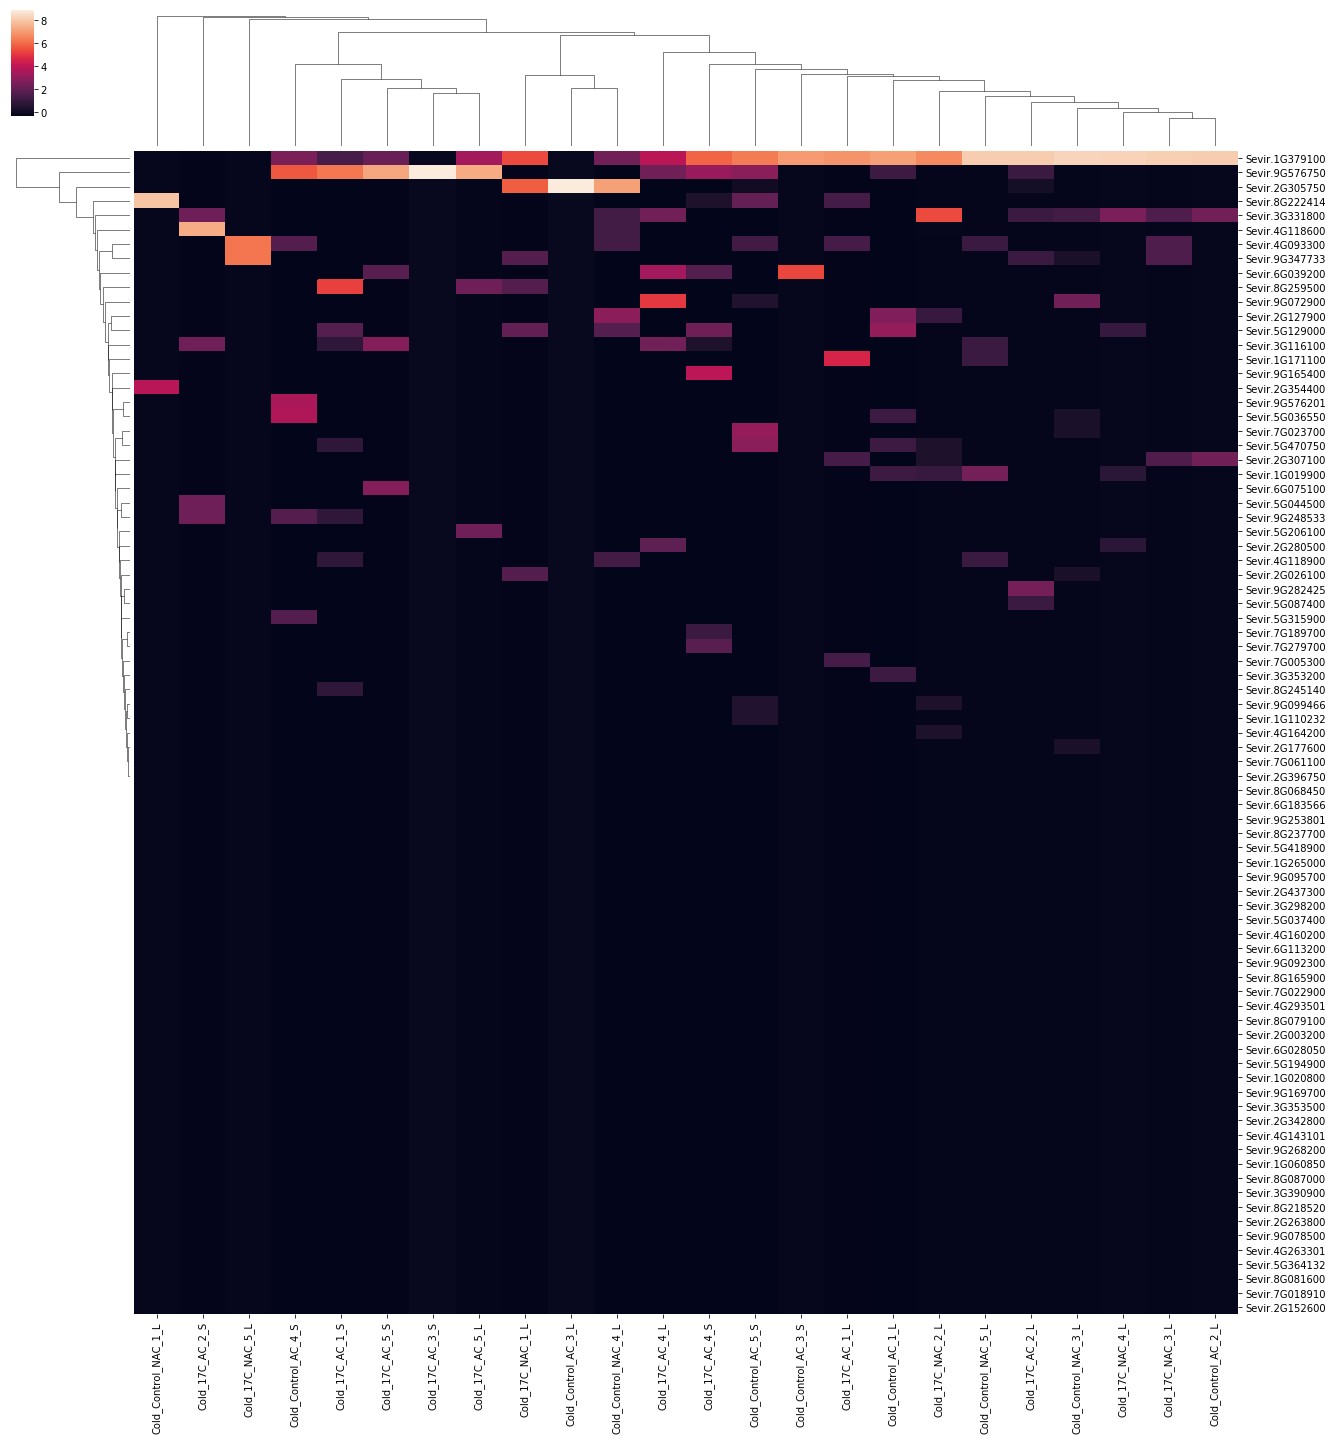

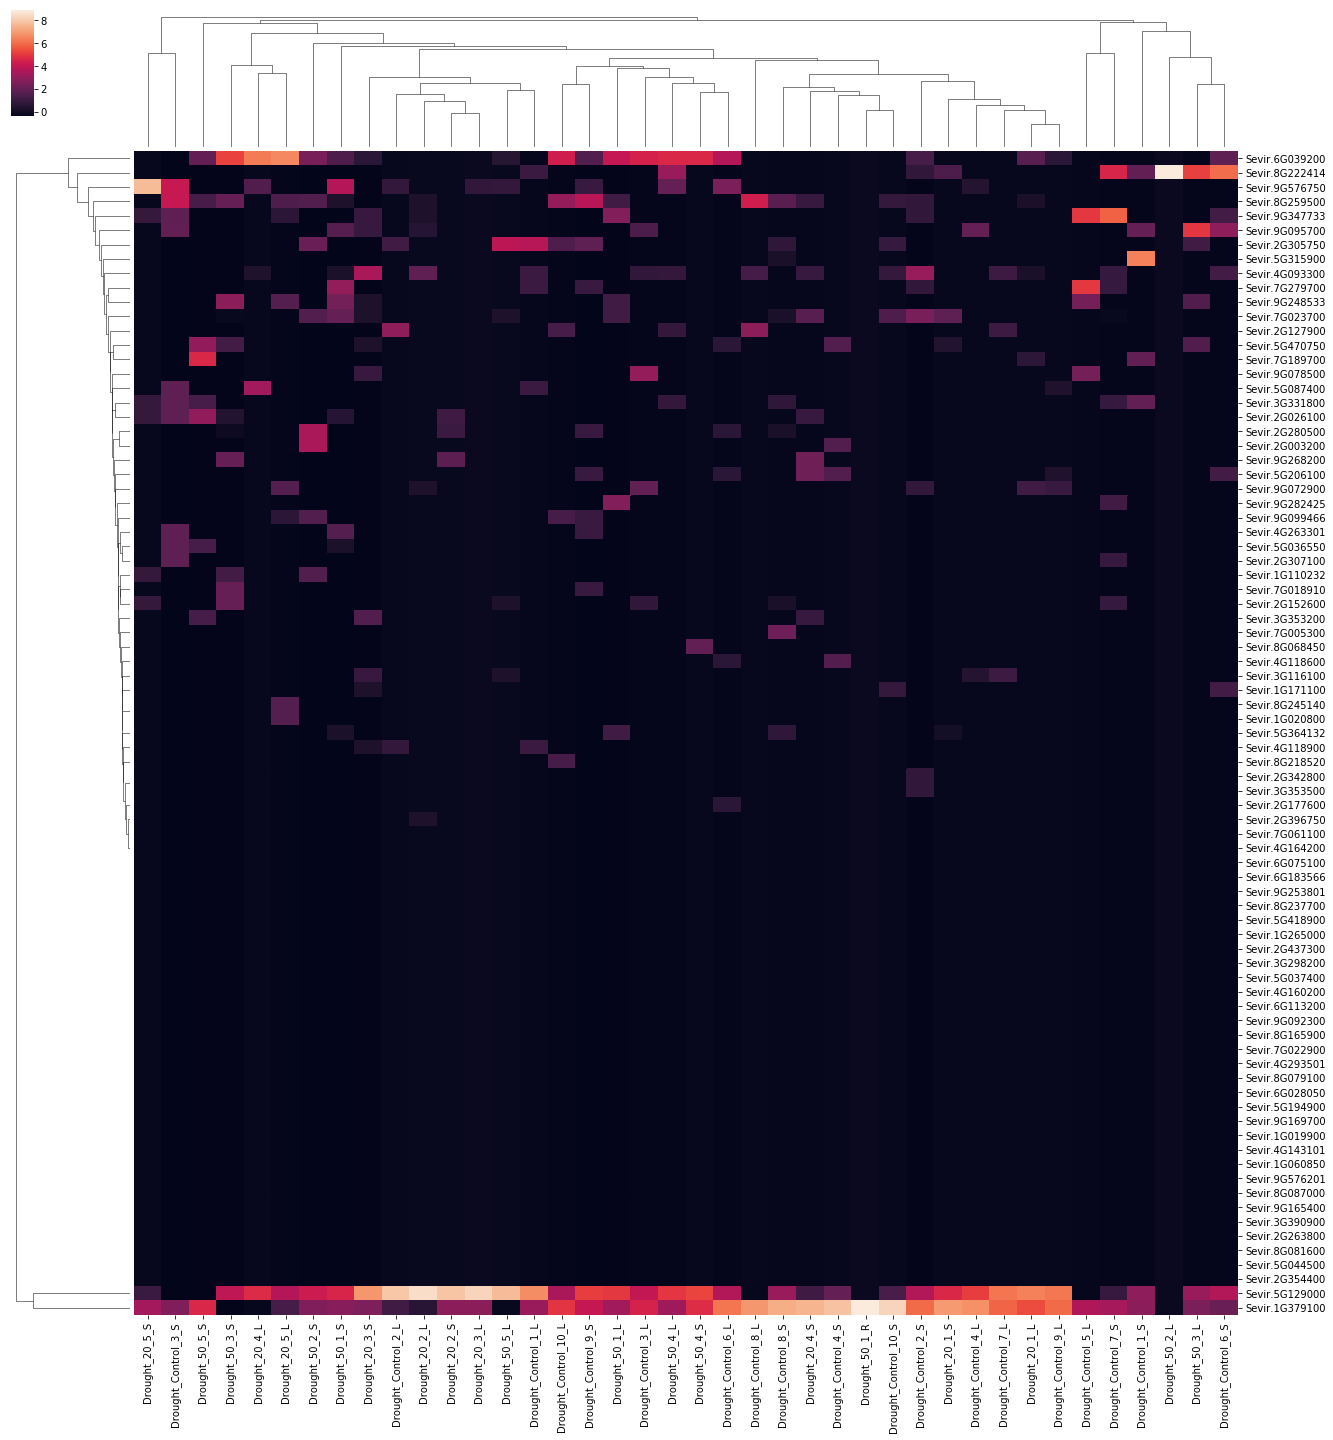

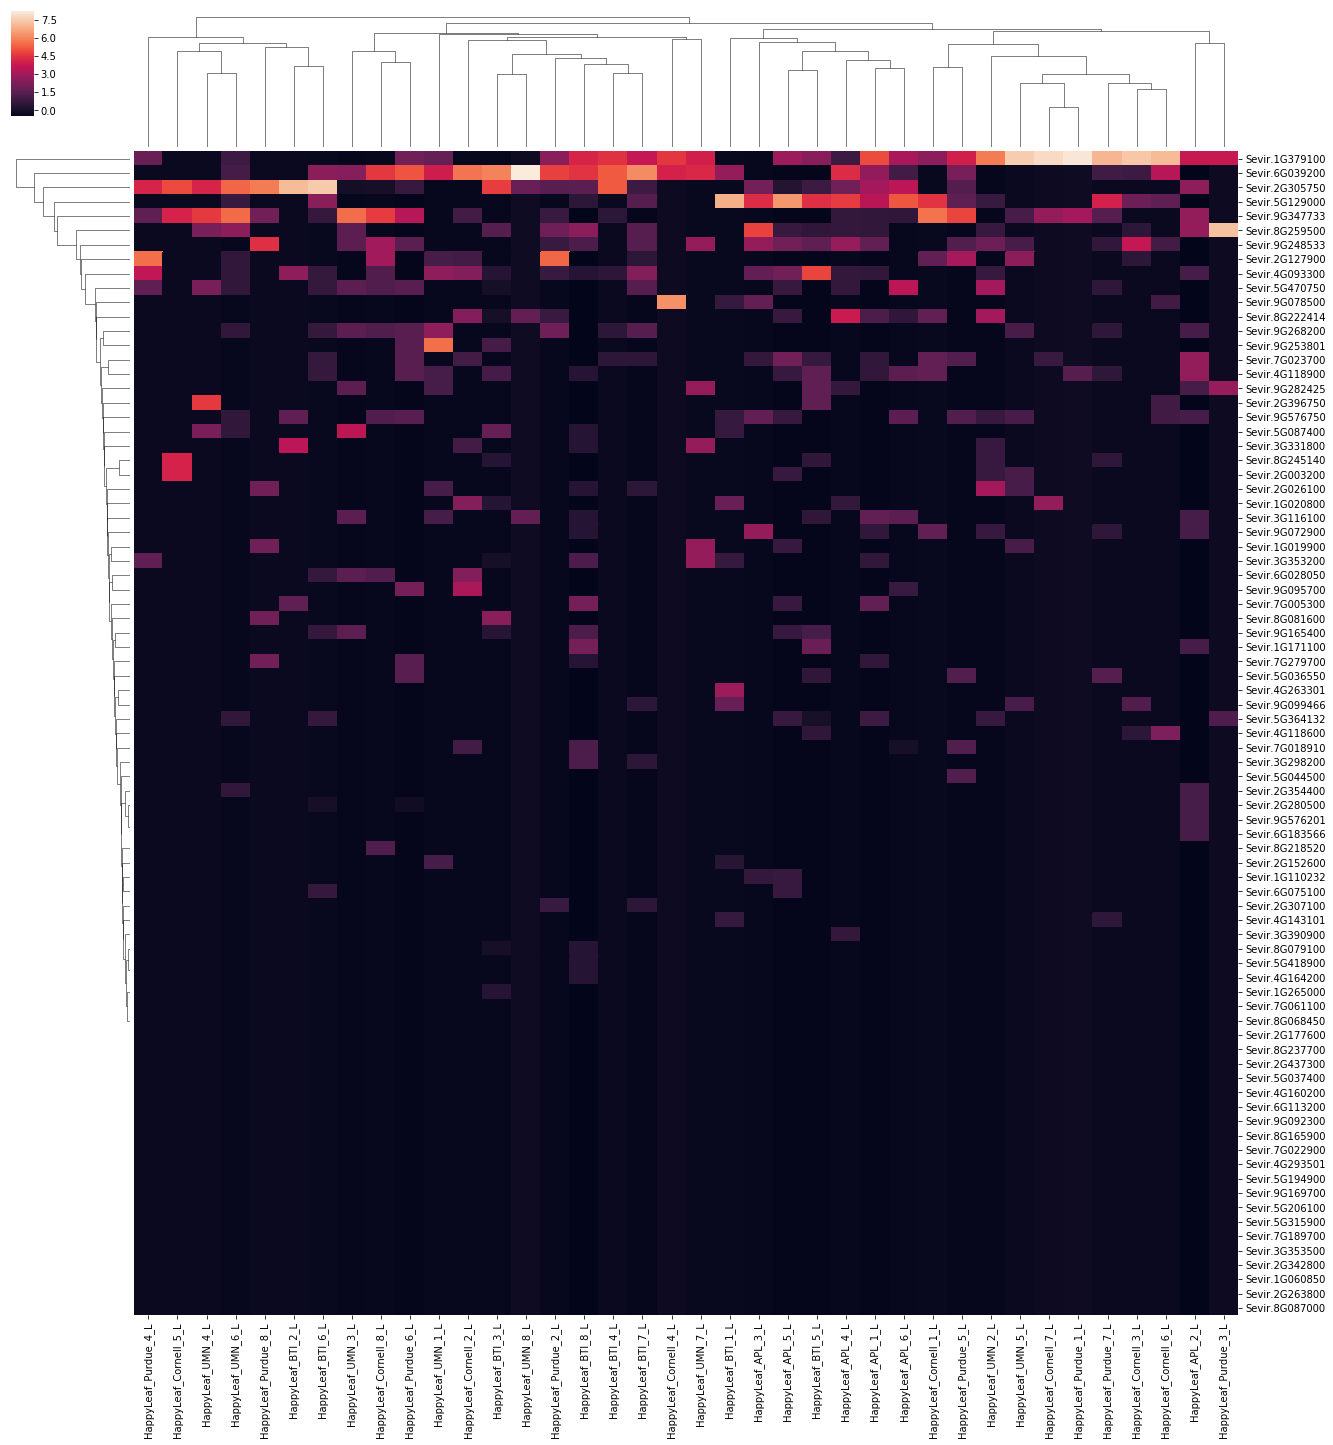

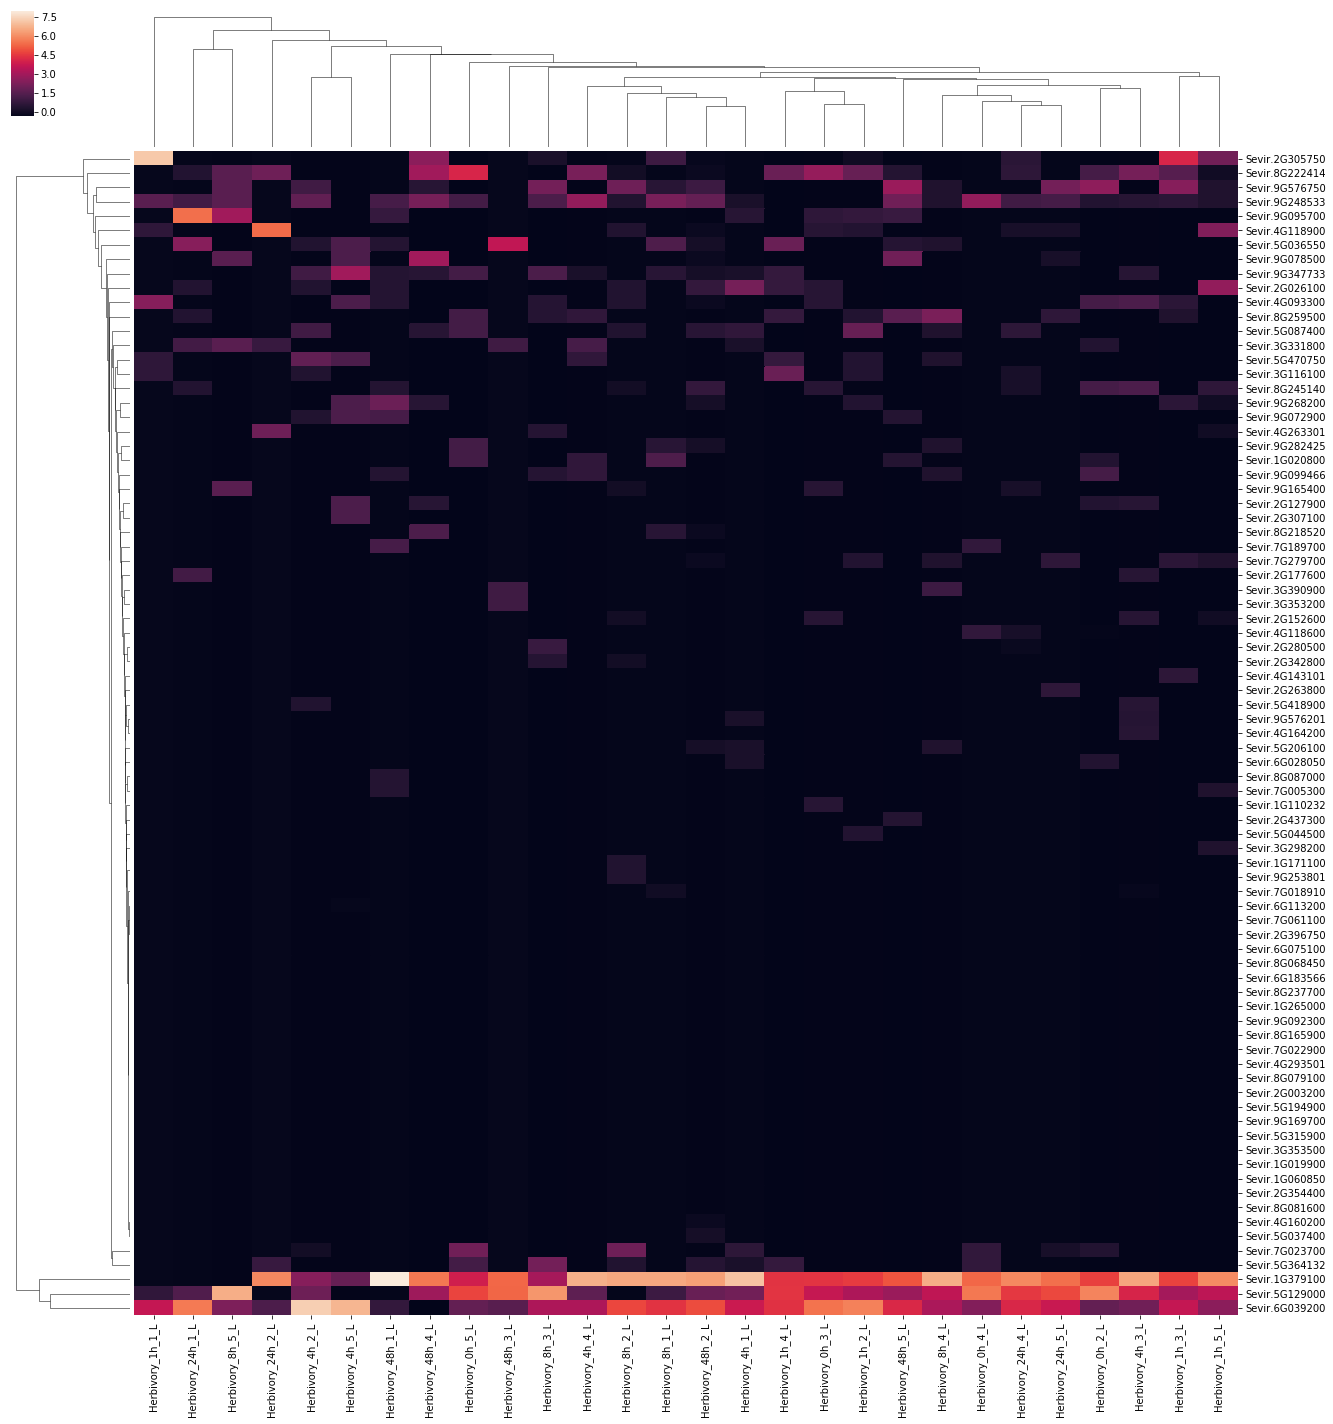

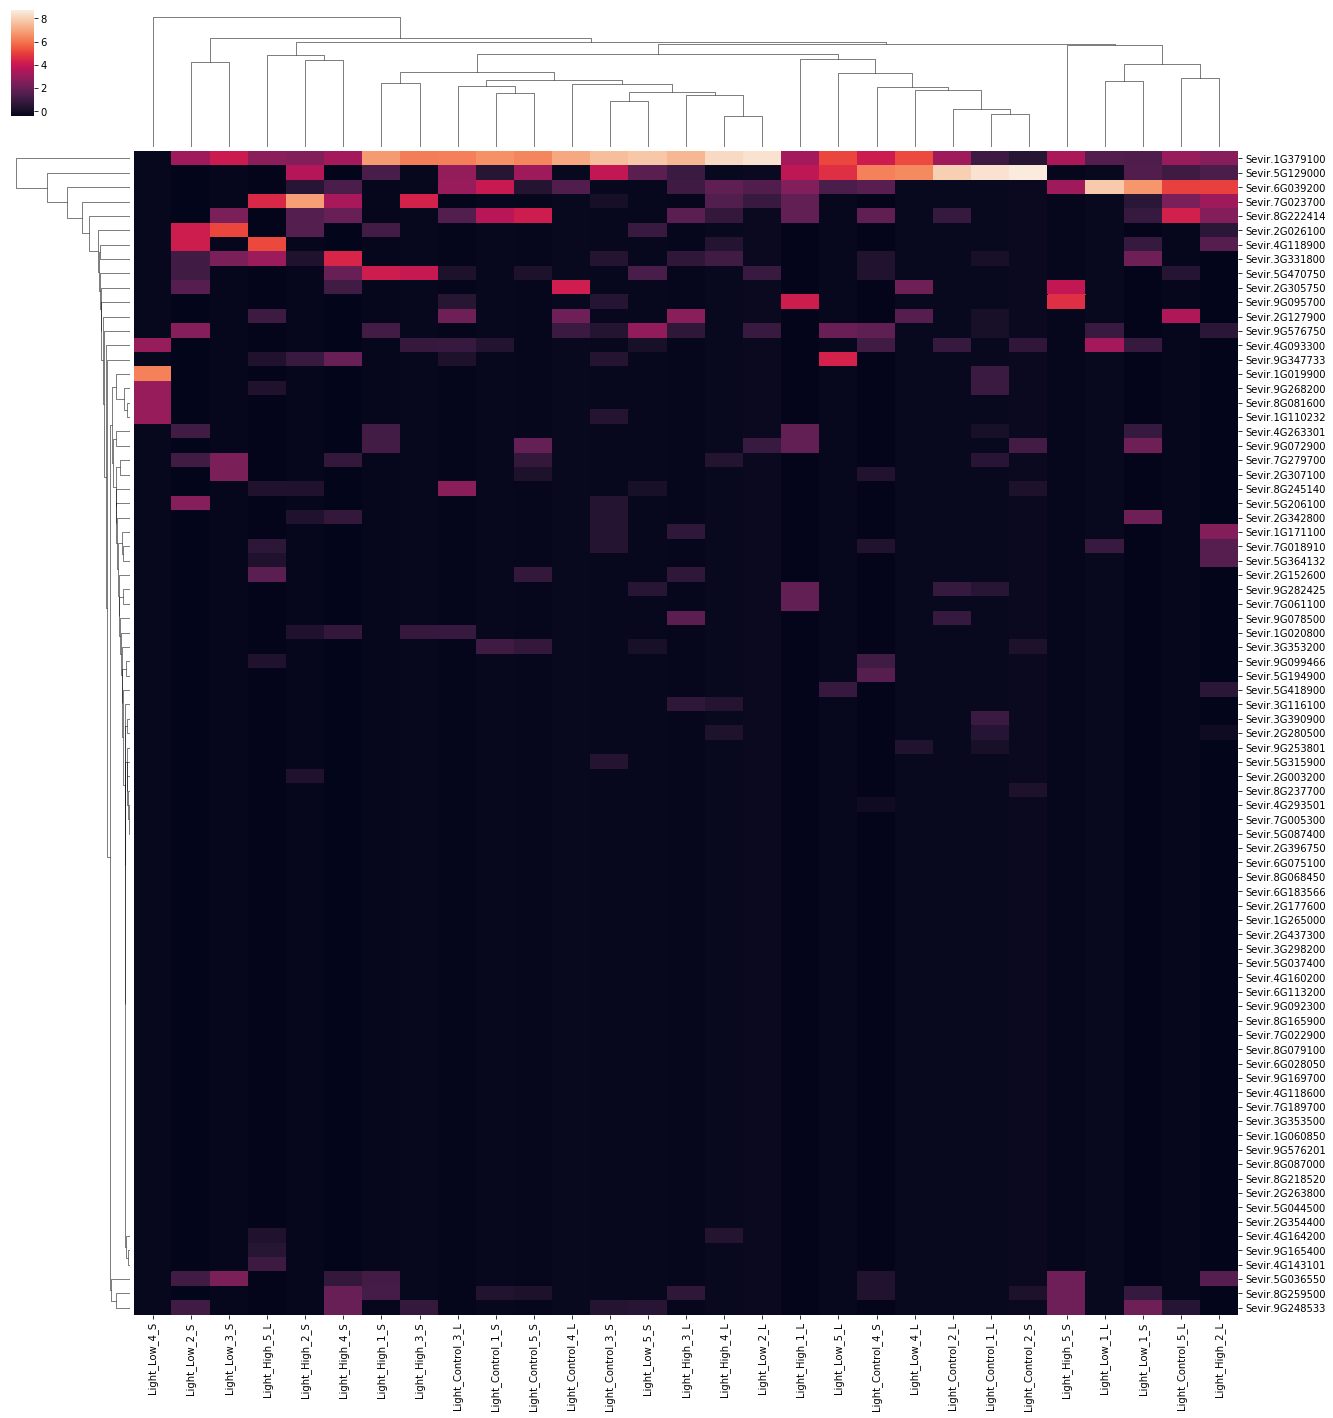

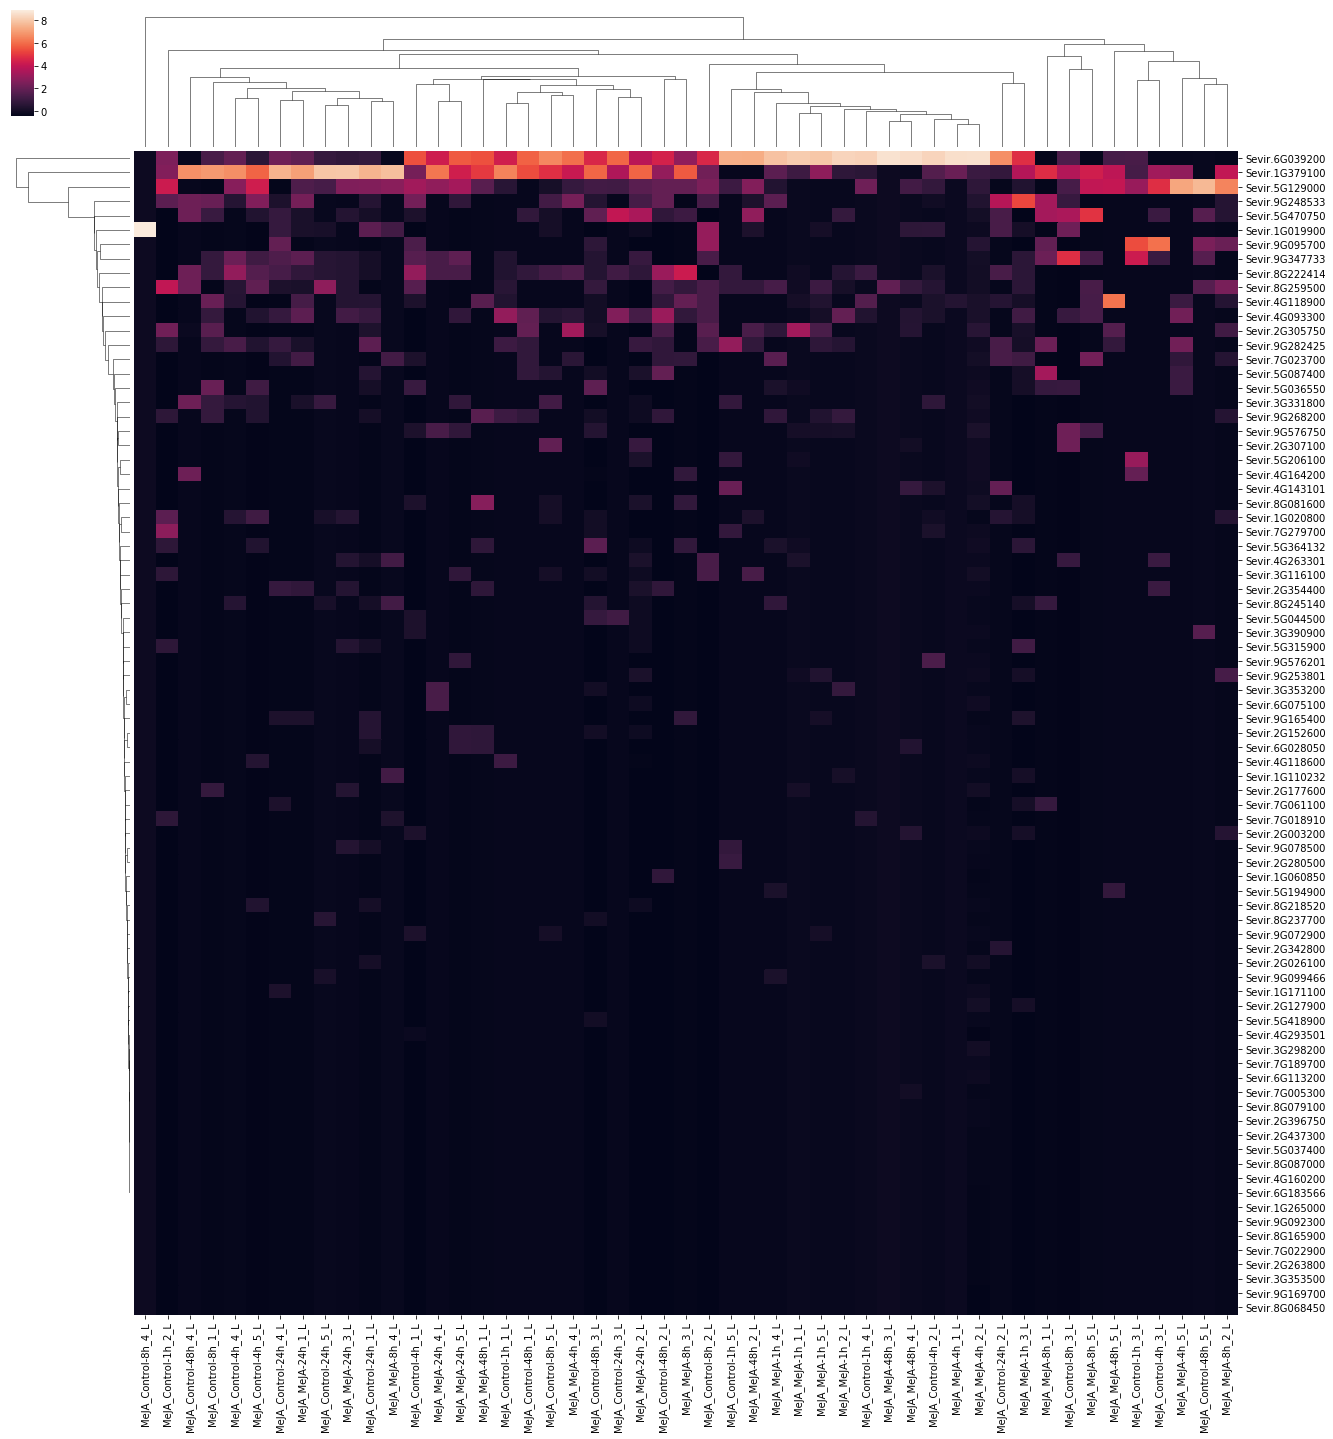

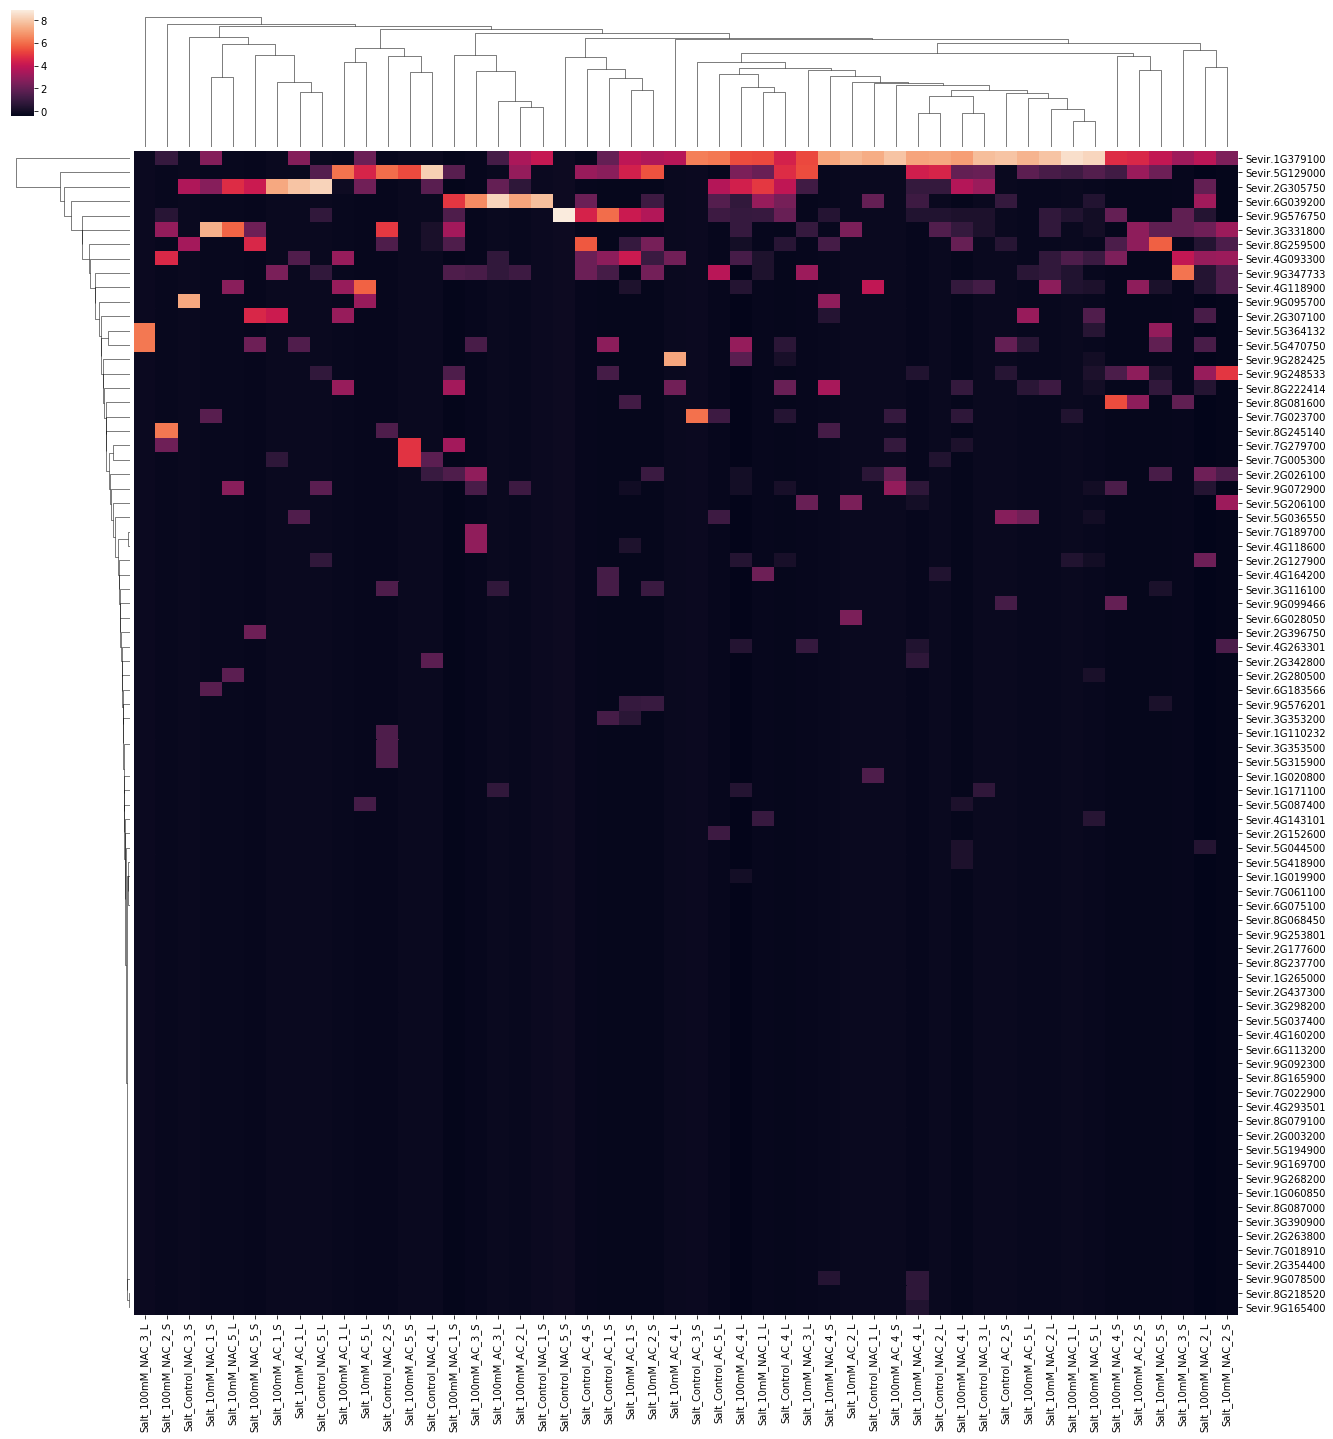

In [42]:
for experiment in experiments: 
    
    experimentExpressionDict = {}
    
    for geneID in genesToPlot:        
        #Create empty key in dictionary for this gene
        experimentExpressionDict[geneID] = {}

        x, y = [], [] #Clear the x,y variables for plotting line

        #go through each condition, and then plot the average expression level for that condition
        index = 0
        
        #If you're wanting to plot ALL conditions/experiments in one heatmap:
        if experiment == 'All':
            for sampleID in sampleDict.keys():
                experimentExpressionDict[geneID][sampleID] = sampleExpDict[geneID][sampleID]
        
        
        #If you want to make a heatmap just for one experiment
        else:
            for sampleID in sampleExpDict[geneID].keys():
                EXPERIMENT = sampleDict[sampleID][1]
                #If the experiment this sample belongs to does not match the experiment we wish to plot then skip
                if EXPERIMENT != experiment:
                    continue
                else:
                    experimentExpressionDict[geneID][sampleID] = sampleExpDict[geneID][sampleID]
                
    ###############################################################
    #Store the expression data in a pandas dataframe for plotting
    df = pd.DataFrame(experimentExpressionDict)
    #Make all columns have float data so they can be plotted
    df[df.columns] = df[df.columns].astype(float)
    #Transpose for viewing
    df = df.transpose()
    #Normalize the dataframe using z-score normalization
    df_norm_col=(df-df.mean())/df.std() #normalize by column by zscore in dataframe
    df = df_norm_col.dropna(axis='columns') #remove any 'na' that may arise due to z-score standardizations
    ###############################################################

    ####Draw clustered heat map
    #Zscore (z_score=0/1) normalize the columns = 1, or rows=0
    sns_plot = sns.clustermap(df,figsize=(22, 24),xticklabels=1)

    fontSize = 10
    #Plotting layout
    plt.setp(sns_plot.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize = fontSize)
    sns_plot.ax_heatmap.set_xticklabels(sns_plot.ax_heatmap.get_xmajorticklabels(), rotation=90, fontsize = 10)
    sns_plot.ax_heatmap.set_yticklabels(sns_plot.ax_heatmap.get_ymajorticklabels(), rotation=0,fontsize = 10)

    plt.show()
    
    